## Liver Disease Prediction

Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model with implementation of  different classifiers on liver patient diseases dataset to predict liver diseases.

Task3:- Create an analysis to show on what basis you have designed your model.  


In [1]:
import pandas as pd
import itertools 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
liver_data_train = pd.read_csv('Indian_Liver_Patient.csv')
print("\nOriginal file:")
print(liver_data_train)


Original file:
     65 Female   0.7  0.1  187  16   18  6.8  3.3   0.9  1
0    62   Male  10.9  5.5  699  64  100  7.5  3.2  0.74  1
1    62   Male   7.3  4.1  490  60   68  7.0  3.3  0.89  1
2    58   Male   1.0  0.4  182  14   20  6.8  3.4  1.00  1
3    72   Male   3.9  2.0  195  27   59  7.3  2.4  0.40  1
4    46   Male   1.8  0.7  208  19   14  7.6  4.4  1.30  1
..   ..    ...   ...  ...  ...  ..  ...  ...  ...   ... ..
577  60   Male   0.5  0.1  500  20   34  5.9  1.6  0.37  2
578  40   Male   0.6  0.1   98  35   31  6.0  3.2  1.10  1
579  52   Male   0.8  0.2  245  48   49  6.4  3.2  1.00  1
580  31   Male   1.3  0.5  184  29   32  6.8  3.4  1.00  1
581  38   Male   1.0  0.3  216  21   24  7.3  4.4  1.50  2

[582 rows x 11 columns]


In [3]:
# List of column headers
headerList = ['Age_of_the_patient', 'Gender_of_the_patient', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase',
          'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio',
          'Target']

# converting data frame to csv
liver_data_train.to_csv("Indian_Liver_Patient_new.csv", header=headerList, index=False)

# display modified csv file
file2 = pd.read_csv("Indian_Liver_Patient_new.csv")
print('\nModified file:')
print(file2)


Modified file:
     Age_of_the_patient Gender_of_the_patient  Total_Bilirubin  \
0                    62                  Male             10.9   
1                    62                  Male              7.3   
2                    58                  Male              1.0   
3                    72                  Male              3.9   
4                    46                  Male              1.8   
..                  ...                   ...              ...   
577                  60                  Male              0.5   
578                  40                  Male              0.6   
579                  52                  Male              0.8   
580                  31                  Male              1.3   
581                  38                  Male              1.0   

     Direct_Bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0                 5.5                   699                        64   
1                 4.1                   490  

In [4]:
file2.head()

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [5]:
file2.shape

(582, 11)

In [6]:
file2['Target'].value_counts()

1    415
2    167
Name: Target, dtype: int64

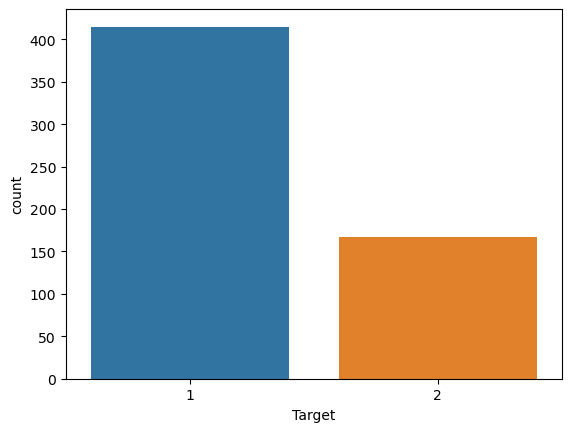

In [7]:
import seaborn as sns
sns.countplot(x='Target', data = file2)
plt.show()

#### 1 : patient with  liver disease and 2: patient with no liver disease disease

In [8]:
# Split the data into features and target label
liver_data_labels = file2['Target']
# Drop label feature
liver_data_features = file2.drop(['Target'], axis=1)
# liver_data_features.head()

In [9]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age_of_the_patient          582 non-null    int64  
 1   Gender_of_the_patient       582 non-null    object 
 2   Total_Bilirubin             582 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        582 non-null    int64  
 5   Alamine_Aminotransferase    582 non-null    int64  
 6   Aspartate_Aminotransferase  582 non-null    int64  
 7   Total_Protiens              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Target                      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


### Missing values

In [10]:
display(liver_data_features[liver_data_features['Albumin_and_Globulin_Ratio'].isnull()])

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
208,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN
240,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN
252,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN
311,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN


### Fill missing values with median value

In [11]:
liver_data_features.Albumin_and_Globulin_Ratio.fillna(liver_data_features['Albumin_and_Globulin_Ratio'].median(), inplace=True)

albumin_globulin_missing_indices = [209, 241, 253, 312]
liver_data_features.loc[albumin_globulin_missing_indices].head()

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,28,Male,0.8,0.3,190,20,14,4.1,2.4,1.4
241,29,Female,0.8,0.2,205,30,23,8.2,4.1,1.0
253,38,Female,0.7,0.1,152,90,21,7.1,4.2,1.4
312,30,Female,0.8,0.2,158,25,22,7.9,4.5,1.3


### Plot features histogram

array([[<AxesSubplot: title={'center': 'Age_of_the_patient'}>,
        <AxesSubplot: title={'center': 'Total_Bilirubin'}>,
        <AxesSubplot: title={'center': 'Direct_Bilirubin'}>],
       [<AxesSubplot: title={'center': 'Alkaline_Phosphotase'}>,
        <AxesSubplot: title={'center': 'Alamine_Aminotransferase'}>,
        <AxesSubplot: title={'center': 'Aspartate_Aminotransferase'}>],
       [<AxesSubplot: title={'center': 'Total_Protiens'}>,
        <AxesSubplot: title={'center': 'Albumin'}>,
        <AxesSubplot: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

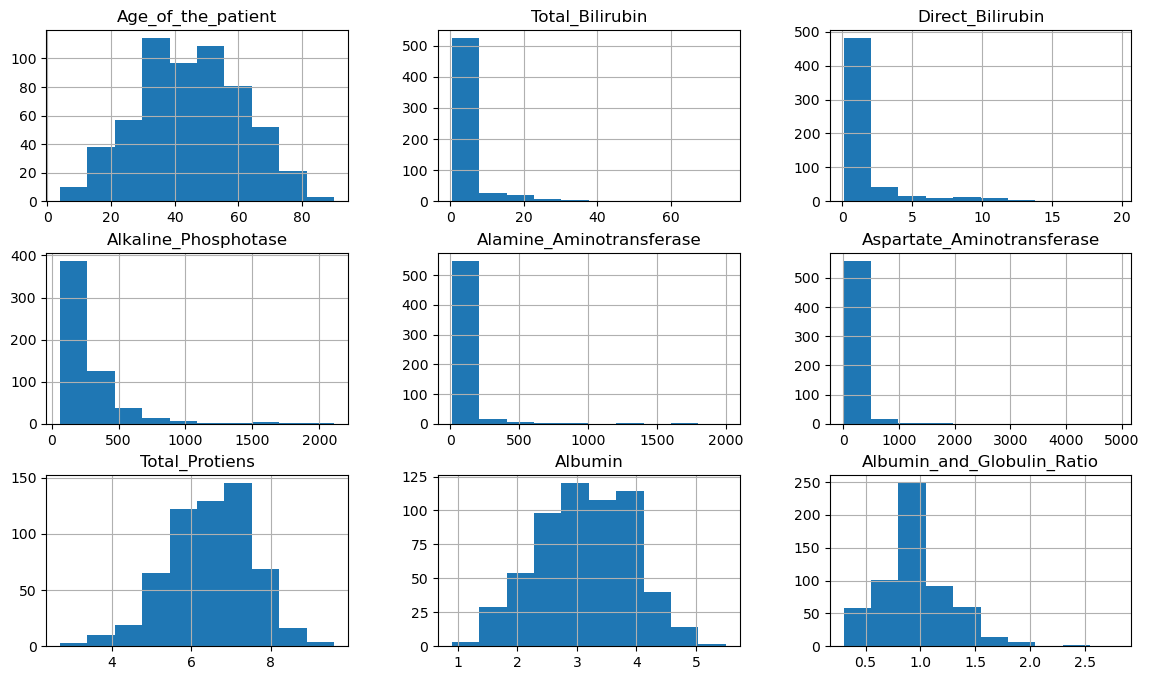

In [12]:
liver_data_features.hist(figsize=(14,8))

array([[<AxesSubplot: title={'center': 'Age_of_the_patient'}>,
        <AxesSubplot: title={'center': 'Total_Bilirubin'}>,
        <AxesSubplot: title={'center': 'Direct_Bilirubin'}>],
       [<AxesSubplot: title={'center': 'Alkaline_Phosphotase'}>,
        <AxesSubplot: title={'center': 'Alamine_Aminotransferase'}>,
        <AxesSubplot: title={'center': 'Aspartate_Aminotransferase'}>],
       [<AxesSubplot: title={'center': 'Total_Protiens'}>,
        <AxesSubplot: title={'center': 'Albumin'}>,
        <AxesSubplot: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

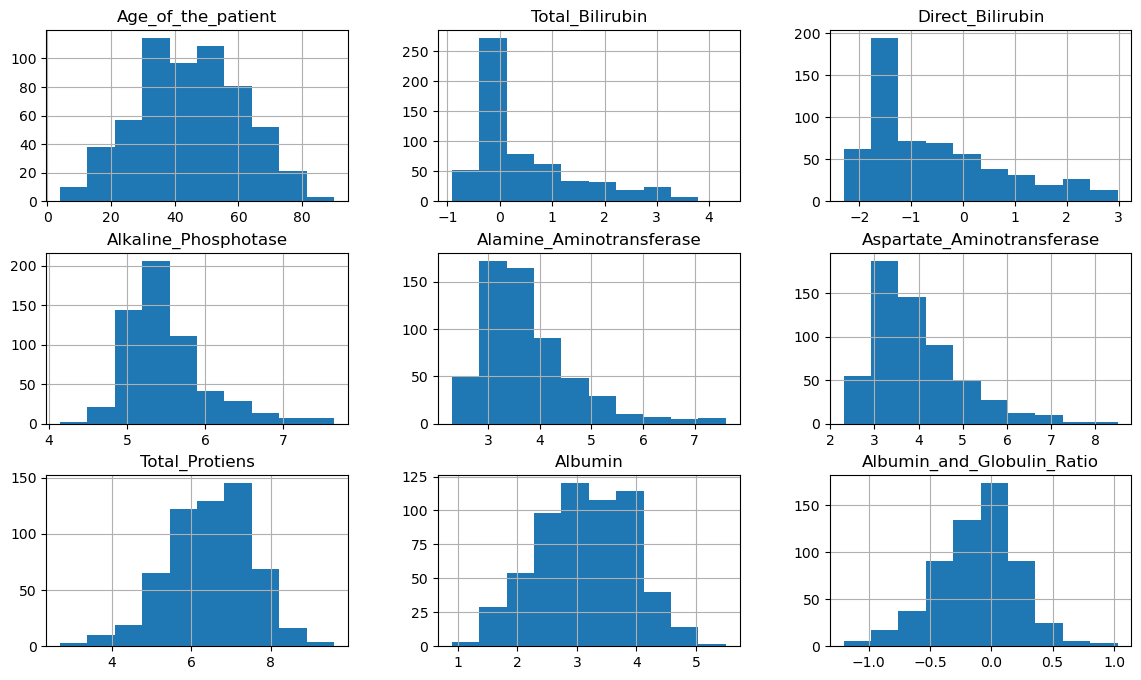

In [13]:
skewed = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin_and_Globulin_Ratio']

liver_data_features_log_transformed = pd.DataFrame(data = liver_data_features)
liver_data_features_log_transformed[skewed] = liver_data_features[skewed].apply(lambda x: np.log(x))

liver_data_features_log_transformed.hist(figsize=(14,8))

In [14]:
liver_data_features_log_transformed.describe()

,Age_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,44.711340,0.464830,-0.647534,5.493868,3.753511,3.958603,6.482646,3.141581,-0.111209
std,16.181921,1.018834,1.325761,0.528470,0.900092,0.997257,1.086306,0.796176,0.344835
min,4.000000,-0.916291,-2.302585,4.143135,2.302585,2.302585,2.700000,0.900000,-1.203973
25%,33.000000,-0.223144,-1.609438,5.166210,3.135494,3.218876,5.800000,2.600000,-0.356675
50%,45.000000,0.000000,-1.203973,5.337538,3.555348,3.737670,6.600000,3.100000,-0.061875
75%,57.750000,0.955511,0.262364,5.697093,4.106742,4.465908,7.200000,3.800000,0.095310
max,90.000000,4.317488,2.980619,7.654443,7.600902,8.502891,9.600000,5.500000,1.029619


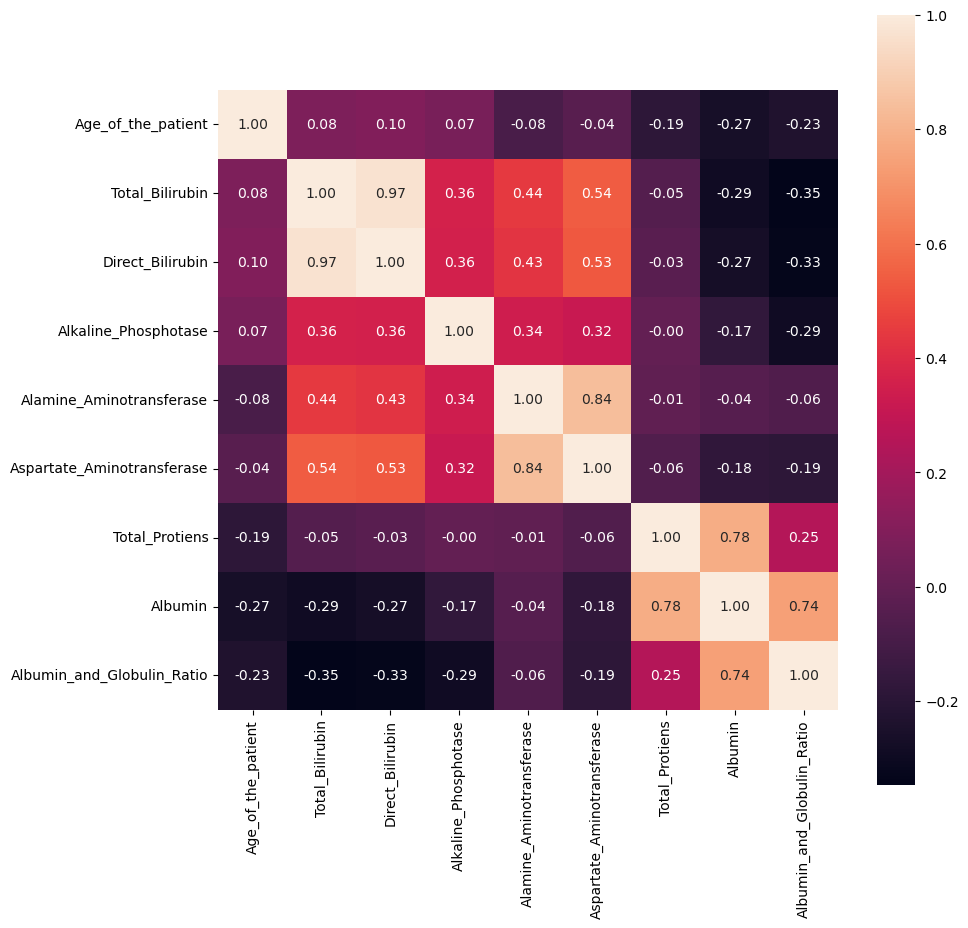

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# calculate correlation coefficients for the dataset
correlations = liver_data_features.corr()

# and visualize
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

### Scaling

In [16]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['Age_of_the_patient', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
             'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

liver_data_features_log_minmax_transform = pd.DataFrame(data = liver_data_features_log_transformed)
liver_data_features_log_minmax_transform[numerical] = scaler.fit_transform(liver_data_features_log_transformed[numerical])

display(liver_data_features_log_minmax_transform.head())

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.674419,Male,0.631485,0.758504,0.685362,0.350356,0.371366,0.695652,0.500000,0.404222
1,0.674419,Male,0.554889,0.702902,0.584190,0.338175,0.309166,0.623188,0.521739,0.486857
2,0.627907,Male,0.175072,0.262397,0.302130,0.063505,0.111792,0.594203,0.543478,0.539030
3,0.790698,Male,0.435110,0.567029,0.321779,0.187466,0.286268,0.666667,0.326087,0.128798
4,0.488372,Male,0.287379,0.368320,0.340159,0.121143,0.054267,0.710145,0.760870,0.656493


In [17]:
liver_data_features_final = pd.get_dummies(liver_data_features_log_minmax_transform, columns=['Gender_of_the_patient'])
liver_data_features_final.head()

,Age_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_of_the_patient_Female,Gender_of_the_patient_Male
0,0.674419,0.631485,0.758504,0.685362,0.350356,0.371366,0.695652,0.500000,0.404222,0,1
1,0.674419,0.554889,0.702902,0.584190,0.338175,0.309166,0.623188,0.521739,0.486857,0,1
2,0.627907,0.175072,0.262397,0.302130,0.063505,0.111792,0.594203,0.543478,0.539030,0,1
3,0.790698,0.435110,0.567029,0.321779,0.187466,0.286268,0.666667,0.326087,0.128798,0,1
4,0.488372,0.287379,0.368320,0.340159,0.121143,0.054267,0.710145,0.760870,0.656493,0,1


### Import train_test_split

In [18]:

from sklearn.model_selection import train_test_split

# Split the 'features' and 'disease prediction' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(liver_data_features_final, 
                                                    liver_data_labels, 
                                                    test_size = 0.2, 
                                                    random_state = 24,
                                                    shuffle = True)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 465 samples.
Testing set has 117 samples.


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [20]:
# Creating object for Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Fitting the model
log_reg_p = log_reg.fit(X_train, y_train)

# Making predictions
y_pred_logreg = log_reg_p.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

# Using function for evaluating the model output

print("#### Classification Report ####")
print(classification_report(y_test,y_pred_logreg))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_pred_logreg))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_pred_logreg))

#### Classification Report ####
              precision    recall  f1-score   support

           1       0.68      0.90      0.77        78
           2       0.43      0.15      0.23        39

    accuracy                           0.65       117
   macro avg       0.55      0.53      0.50       117
weighted avg       0.60      0.65      0.59       117

#### Accuracy Score ####
accuracy score :  0.6495726495726496

#### Confusion Matrix ####
[[70  8]
 [33  6]]


### DecisionTreeClassifier

In [22]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Creating object for Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=7)

# Fitting the model
dtc_p = dtc.fit(X_train, y_train)

# Making predictions
y_pred_dtc = dtc_p.predict(X_test)

In [23]:
# Using function for evaluating the model output

print("#### Classification Report ####")
print(classification_report(y_test,y_pred_dtc))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_pred_dtc))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_pred_dtc))

#### Classification Report ####
              precision    recall  f1-score   support

           1       0.70      0.85      0.77        78
           2       0.48      0.28      0.35        39

    accuracy                           0.66       117
   macro avg       0.59      0.56      0.56       117
weighted avg       0.63      0.66      0.63       117

#### Accuracy Score ####
accuracy score :  0.6581196581196581

#### Confusion Matrix ####
[[66 12]
 [28 11]]


#### Hyper Parameter Tuning for DecisionTreeClassifier

In [24]:
from scipy.stats import randint

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3,4,5,6], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9)} 

In [25]:
# Instantiate a Decision Tree regressor: tree
tree = DecisionTreeClassifier()
  
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 

# Fit it to the data
tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 7}
Best score is 0.724731182795699


### K Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Creating object for KNeighborsClassifier
k_nearest = KNeighborsClassifier(n_neighbors = 7)

# Fitting the model
k_nearest_p = k_nearest.fit(X_train, y_train)

# Making predictions
y_pred_k_nearest = k_nearest_p.predict(X_test)

In [27]:
# Using function for evaluating the model output

print("#### Classification Report ####")
print(classification_report(y_test,y_pred_k_nearest))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_pred_k_nearest))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_pred_k_nearest))

#### Classification Report ####
              precision    recall  f1-score   support

           1       0.75      0.88      0.81        78
           2       0.64      0.41      0.50        39

    accuracy                           0.73       117
   macro avg       0.70      0.65      0.66       117
weighted avg       0.71      0.73      0.71       117

#### Accuracy Score ####
accuracy score :  0.7264957264957265

#### Confusion Matrix ####
[[69  9]
 [23 16]]


#### KNN Hyper parameter

In [28]:
#List Hyperparameters that we want to tune.
n_neighbors=list(range(1,30))
weights=['uniform','distance']
leaf_size=list(range(1,50))
algoritham=['auto', 'ball_tree', 'kd_tree', 'brute']
metric=['minkowski','Euclidean']

In [29]:
#Convert to dictionary
kNN_grid={'n_neighbors':n_neighbors,'weights':weights,'leaf_size':leaf_size,'metric':metric}

#Use GridSearch
random_cv = RandomizedSearchCV(estimator=k_nearest,param_distributions=kNN_grid,cv=5,random_state=42,n_jobs=1,scoring='r2')

#Fit the model
random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
                   n_jobs=1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'metric': ['minkowski', 'Euclidean'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'weigh

In [30]:
#Print The value of best Hyperparameters
random_cv.best_estimator_

KNeighborsClassifier(leaf_size=46, n_neighbors=4)

In [31]:
random_cv.best_score_

-0.4226041737016278

In [32]:
random_cv.best_params_

{'weights': 'uniform',
 'n_neighbors': 4,
 'metric': 'minkowski',
 'leaf_size': 46}

In [33]:
random_cv.fit(X_test, y_test)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
                   n_jobs=1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'metric': ['minkowski', 'Euclidean'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'weigh

In [34]:
random_cv.best_score_

-0.5005952380952382

### Support Vector Machine

In [35]:
from sklearn.svm import SVC

# Creating object for Support Vector Classifier
svc = SVC()

# Fitting the model
svc.fit(X_train, y_train)
  
# print prediction results
y_pred_svc = svc.predict(X_test)

In [36]:
# Using function for evaluating the model output

print("#### Classification Report ####")
print(classification_report(y_test,y_pred_svc))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_pred_svc))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_pred_svc))

#### Classification Report ####
              precision    recall  f1-score   support

           1       0.67      1.00      0.80        78
           2       0.00      0.00      0.00        39

    accuracy                           0.67       117
   macro avg       0.33      0.50      0.40       117
weighted avg       0.44      0.67      0.53       117

#### Accuracy Score ####
accuracy score :  0.6666666666666666

#### Confusion Matrix ####
[[78  0]
 [39  0]]


#### Hyper Parameter Tuning for Support Vector Machine

In [37]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.645 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.710 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.710 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.699 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [38]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)


In [39]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80        78
           2       0.00      0.00      0.00        39

    accuracy                           0.67       117
   macro avg       0.33      0.50      0.40       117
weighted avg       0.44      0.67      0.53       117



### Nu Support Vector Classifier (NuSVC)

In [40]:
from sklearn.svm import NuSVC

# Creating object for NuSVC
nusvc = NuSVC() 

# Fitting the model
nusvc.fit(X_train,y_train)

# print prediction results
y_predict_nusvc = nusvc.predict(X_test)

In [41]:
# Using function for evaluating the model output

print("#### Classification Report ####")
print(classification_report(y_test,y_predict_nusvc))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_predict_nusvc))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_predict_nusvc))

#### Classification Report ####
              precision    recall  f1-score   support

           1       0.70      0.91      0.79        78
           2       0.56      0.23      0.33        39

    accuracy                           0.68       117
   macro avg       0.63      0.57      0.56       117
weighted avg       0.66      0.68      0.64       117

#### Accuracy Score ####
accuracy score :  0.6837606837606838

#### Confusion Matrix ####
[[71  7]
 [30  9]]


### ANN [MLP Classifier]

In [42]:
# Importing library and object creation
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=100,
                      random_state=42)

# Fitting the training data
mlpc.fit(X_train,y_train)

# print prediction results
y_predict_mlpc = mlpc.predict(X_test)

In [43]:
# Using function for evaluating the model output

print("#### Classification Report ####")
print(classification_report(y_test,y_predict_mlpc))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_predict_mlpc))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_predict_mlpc))

#### Classification Report ####
              precision    recall  f1-score   support

           1       0.68      1.00      0.81        78
           2       1.00      0.05      0.10        39

    accuracy                           0.68       117
   macro avg       0.84      0.53      0.45       117
weighted avg       0.79      0.68      0.57       117

#### Accuracy Score ####
accuracy score :  0.6837606837606838

#### Confusion Matrix ####
[[78  0]
 [37  2]]


### ExtraTreesClassifier

In [44]:
# importing library and object creation
from sklearn.ensemble import ExtraTreesClassifier

# Building the model
etf = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# fitting the training data
etf.fit(X_train,y_train)

# print prediction results
y_predict_etf = etf.predict(X_test)

In [45]:
# Using function for evaluating the model output

print("#### Classification Report ####")
print(classification_report(y_test,y_predict_etf))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,y_predict_etf))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,y_predict_etf))

#### Classification Report ####
              precision    recall  f1-score   support

           1       0.74      0.86      0.80        78
           2       0.59      0.41      0.48        39

    accuracy                           0.71       117
   macro avg       0.67      0.63      0.64       117
weighted avg       0.69      0.71      0.69       117

#### Accuracy Score ####
accuracy score :  0.7094017094017094

#### Confusion Matrix ####
[[67 11]
 [23 16]]


### AdaBoostClassifier

In [46]:
# importing library and object creation
from sklearn.ensemble import AdaBoostClassifier

abc =AdaBoostClassifier(n_estimators=100, random_state=0)

# fitting the training data
abc.fit(X_train,y_train)

# Prediction on training data
abc_train_predict = abc.predict(X_test)

In [47]:
# Using function for evaluating the model output

print("#### Classification Report ####")
print(classification_report(y_test,abc_train_predict))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(y_test,abc_train_predict))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(y_test,abc_train_predict))

#### Classification Report ####
              precision    recall  f1-score   support

           1       0.71      0.74      0.72        78
           2       0.43      0.38      0.41        39

    accuracy                           0.62       117
   macro avg       0.57      0.56      0.57       117
weighted avg       0.61      0.62      0.62       117

#### Accuracy Score ####
accuracy score :  0.6239316239316239

#### Confusion Matrix ####
[[58 20]
 [24 15]]


#### Conclusion

In accordance with the specified objects, the dataset has been reviewed, a model has been built, and the problems have been read using test data. We attempted to use every system in the design at hand, and since the title train was absent from the dataset, we created one. After that, we used significant algorithms, performed their hyperparameter calculations, and sought to achieve the best fit possible for the design, which we did by using the DecisionTreeClassifier algorithm.